<a href="https://colab.research.google.com/github/AstroMechh/Final-Project-Group-2/blob/main/Articulo_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/MCPI/Articulo/Comparacion.csv")

In [4]:
dataset.head()

,Hr,Luz Natural,Luz Amarilla,Luz Roja,Luz Verde
0,NaN,0.54,0.58,0.57,0.65
1,NaN,0.54,0.58,0.57,0.65
2,NaN,0.54,0.60,0.58,0.64
3,NaN,0.54,0.61,0.58,0.65
4,NaN,0.54,0.60,0.59,0.64


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hr            5 non-null      float64
 1   Luz Natural   601 non-null    float64
 2   Luz Amarilla  601 non-null    float64
 3   Luz Roja      601 non-null    float64
 4   Luz Verde     601 non-null    float64
dtypes: float64(5)
memory usage: 23.6 KB


In [6]:
dataset.describe()

,Hr,Luz Natural,Luz Amarilla,Luz Roja,Luz Verde
count,5.000000,601.000000,601.000000,601.000000,601.000000
mean,3.000000,0.544077,0.630416,0.579418,0.628652
std,1.581139,0.015062,0.012948,0.012695,0.018221
min,1.000000,0.500000,0.580000,0.540000,0.570000
25%,2.000000,0.540000,0.620000,0.570000,0.620000
50%,3.000000,0.540000,0.630000,0.580000,0.630000
75%,4.000000,0.550000,0.640000,0.590000,0.640000
max,5.000000,0.600000,0.670000,0.620000,0.690000


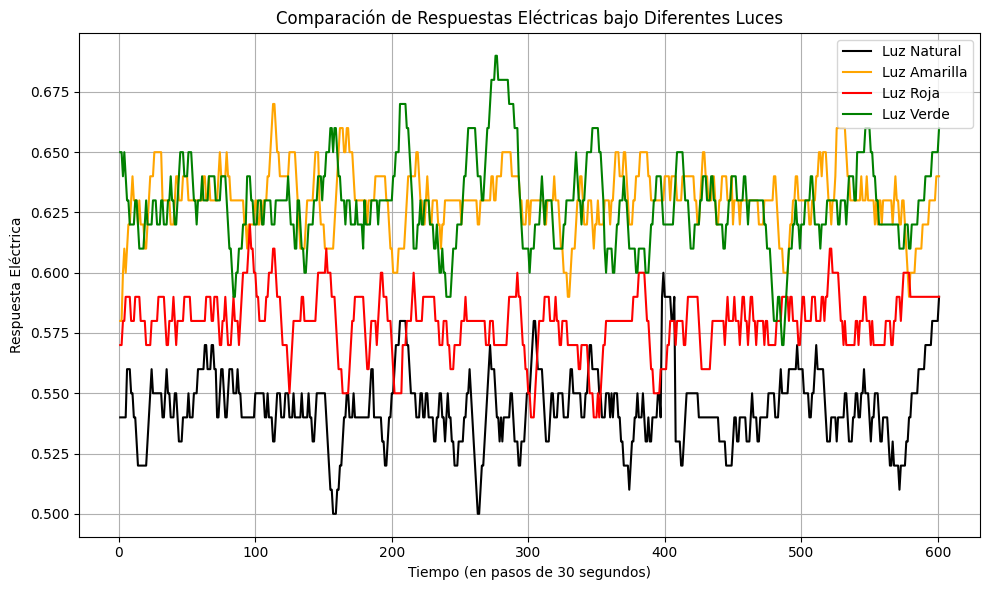

In [7]:
import matplotlib.pyplot as plt

# Asegúrate de que el eje X sea numérico (por ejemplo, 1, 2, 3, ...).
x_values = range(1, len(dataset) + 1)  # Crear un rango de números según el tamaño del dataset.

# Graficar las respuestas eléctricas bajo diferentes luces.
plt.figure(figsize=(10, 6))
plt.plot(x_values, dataset["Luz Natural"], label="Luz Natural", color="black")
plt.plot(x_values, dataset["Luz Amarilla"], label="Luz Amarilla", color="orange")
plt.plot(x_values, dataset["Luz Roja"], label="Luz Roja", color="red")
plt.plot(x_values, dataset["Luz Verde"], label="Luz Verde", color="green")

# Etiquetas y título.
plt.xlabel("Tiempo (en pasos de 30 segundos)")
plt.ylabel("Respuesta Eléctrica")
plt.title("Comparación de Respuestas Eléctricas bajo Diferentes Luces")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
print("\nValores faltantes por columna:")
print(dataset.isnull().sum())



Valores faltantes por columna:
Hr              596
Luz Natural       0
Luz Amarilla      0
Luz Roja          0
Luz Verde         0
dtype: int64


In [9]:
# Crear etiquetas manualmente
# Por ejemplo, asignar el tipo de luz para cada fila
labels = ["Luz Natural", "Luz Amarilla", "Luz Roja", "Luz Verde"]

# Repetir las etiquetas para igualar el número de filas
num_samples = len(dataset)
y = labels * (num_samples // len(labels)) + labels[:(num_samples % len(labels))]

# Verificar la longitud de las etiquetas
print(f"Número de filas en el dataset: {num_samples}")
print(f"Número de etiquetas generadas: {len(y)}")

# Seleccionar características (X)
X = dataset[["Luz Natural", "Luz Amarilla", "Luz Roja", "Luz Verde"]]

# Verificar las dimensiones de X y y
print(f"Tamaño de X: {X.shape}")
print(f"Tamaño de y: {len(y)}")

Número de filas en el dataset: 601
Número de etiquetas generadas: 601
Tamaño de X: (601, 4)
Tamaño de y: 601


### Step 2

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características (opcional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las dimensiones
print("Tamaño de X_train:", X_train_scaled.shape)
print("Tamaño de y_train:", len(y_train))
print("Tamaño de X_test:", X_test_scaled.shape)
print("Tamaño de y_test:", len(y_test))


Tamaño de X_train: (420, 4)
Tamaño de y_train: 420
Tamaño de X_test: (181, 4)
Tamaño de y_test: 181


## Random Forest

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_svm = svm_model.predict(X_test_scaled)
print("Accuracy del modelo SVM:", accuracy_score(y_test, y_pred_svm))
print("\nReporte de clasificación para SVM:")
print(classification_report(y_test, y_pred_svm))


Accuracy del modelo SVM: 0.2154696132596685

Reporte de clasificación para SVM:
              precision    recall  f1-score   support

Luz Amarilla       0.00      0.00      0.00        46
 Luz Natural       0.00      0.00      0.00        57
    Luz Roja       0.24      0.40      0.30        40
   Luz Verde       0.20      0.61      0.30        38

    accuracy                           0.22       181
   macro avg       0.11      0.25      0.15       181
weighted avg       0.10      0.22      0.13       181



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Crear el modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar el modelo
clf.fit(X_train_scaled, y_train)

# 3. Hacer predicciones con los datos de prueba
y_pred = clf.predict(X_test_scaled)

# 4. Evaluar el modelo
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy del modelo: 0.15469613259668508

Reporte de clasificación:
              precision    recall  f1-score   support

Luz Amarilla       0.10      0.09      0.09        46
 Luz Natural       0.18      0.12      0.15        57
    Luz Roja       0.22      0.23      0.22        40
   Luz Verde       0.13      0.21      0.16        38

    accuracy                           0.15       181
   macro avg       0.16      0.16      0.16       181
weighted avg       0.16      0.15      0.15       181



In [13]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
svm = SVC()

# Definir los parámetros para búsqueda
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Realizar búsqueda
grid = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_scaled, y_train)

# Mejor modelo y predicciones
print("Best parameters:", grid.best_params_)
y_pred_svm = grid.predict(X_test_scaled)
print("Accuracy con GridSearch:", accuracy_score(y_test, y_pred_svm))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.01, 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Cambia el número de vecinos si es necesario

# Entrenar el modelo
knn_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy del modelo KNN:", accuracy_score(y_test, y_pred_knn))
print("\nReporte de clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))


Accuracy del modelo KNN: 0.1878453038674033

Reporte de clasificación para KNN:
              precision    recall  f1-score   support

Luz Amarilla       0.16      0.22      0.19        46
 Luz Natural       0.32      0.25      0.28        57
    Luz Roja       0.14      0.12      0.13        40
   Luz Verde       0.12      0.13      0.13        38

    accuracy                           0.19       181
   macro avg       0.19      0.18      0.18       181
weighted avg       0.20      0.19      0.19       181



In [15]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Codificar las etiquetas de y como valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Crear el modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train_encoded)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy del modelo XGBoost:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nReporte de clasificación para XGBoost:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:25:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy del modelo XGBoost: 0.14917127071823205

Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

Luz Amarilla       0.15      0.15      0.15        46
 Luz Natural       0.18      0.09      0.12        57
    Luz Roja       0.17      0.20      0.18        40
   Luz Verde       0.12      0.18      0.14        38

    accuracy                           0.15       181
   macro avg       0.15      0.16      0.15       181
weighted avg       0.16      0.15      0.15       181



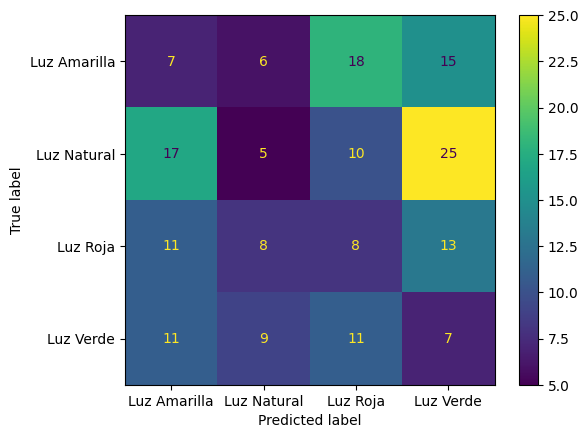

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_scaled, y_test_encoded, display_labels=label_encoder.classes_)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

Classification Report - SVM
              precision    recall  f1-score   support

Luz Amarilla       0.63      1.00      0.77       399
    Luz Roja       0.00      0.00      0.00         0
   Luz Verde       1.00      0.27      0.42       323

    accuracy                           0.67       722
   macro avg       0.54      0.42      0.40       722
weighted avg       0.79      0.67      0.62       722


Classification Report - Random Forest
              precision    recall  f1-score   support

Luz Amarilla       0.99      0.98      0.98       399
    Luz Roja       0.00      0.00      0.00         0
   Luz Verde       0.97      0.98      0.98       323

    accuracy                           0.98       722
   macro avg       0.65      0.65      0.65       722
weighted avg       0.98      0.98      0.98       722



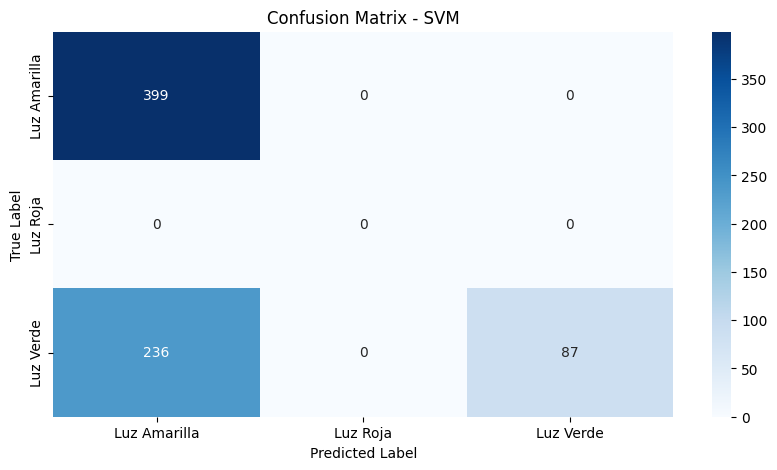

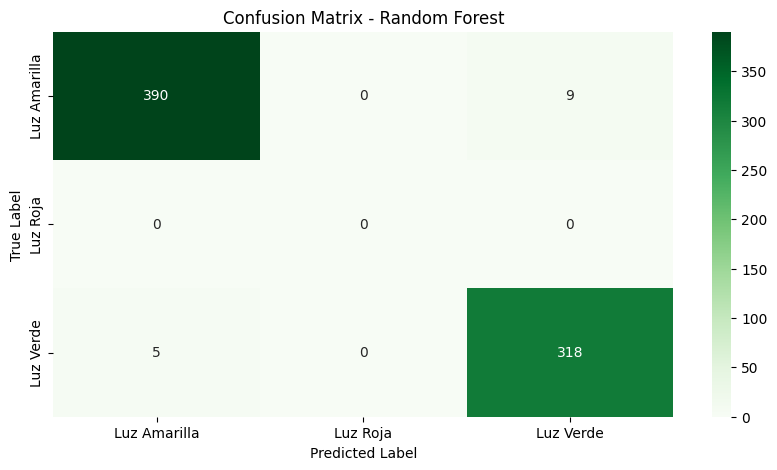

In [17]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
file_path = "/content/drive/MyDrive/MCPI/Articulo/Caracteristicas_Aumentadas.csv"  # Ajusta esto si es necesario
data = pd.read_csv(file_path)

# Preparar los datos
# Crear etiquetas basadas en la máxima intensidad de las columnas de luz
# Esto asume que las columnas de intensidad son Luz Natural, Luz Amarilla, Luz Roja, Luz Verde
data['Etiqueta'] = data[['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']].idxmax(axis=1)

# Características (X) y etiquetas (y)
X = data[['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']]
y = data['Etiqueta']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluar los modelos
unique_labels = sorted(list(set(y_train.unique()).union(set(y_test.unique()))))  # Combinar etiquetas de entrenamiento y prueba
svm_report = classification_report(y_test, svm_pred, labels=unique_labels, target_names=[str(label) for label in unique_labels])
rf_report = classification_report(y_test, rf_pred, labels=unique_labels, target_names=[str(label) for label in unique_labels])

# Matrices de confusión
svm_conf_matrix = confusion_matrix(y_test, svm_pred, labels=unique_labels)
rf_conf_matrix = confusion_matrix(y_test, rf_pred, labels=unique_labels)

# Mostrar reportes
print("Classification Report - SVM")
print(svm_report)
print("\nClassification Report - Random Forest")
print(rf_report)

# Graficar la matriz de confusión para SVM
plt.figure(figsize=(10, 5))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Graficar la matriz de confusión para Random Forest
plt.figure(figsize=(10, 5))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Classification Report - SVM
              precision    recall  f1-score   support

Luz Amarilla       0.90      1.00      0.95       242
 Luz Natural       0.96      0.87      0.91        99
    Luz Roja       0.96      0.97      0.97       196
   Luz Verde       0.99      0.89      0.94       185

    accuracy                           0.95       722
   macro avg       0.95      0.93      0.94       722
weighted avg       0.95      0.95      0.95       722


Classification Report - Random Forest
              precision    recall  f1-score   support

Luz Amarilla       0.97      0.97      0.97       242
 Luz Natural       0.97      0.96      0.96        99
    Luz Roja       0.97      0.97      0.97       196
   Luz Verde       0.97      0.97      0.97       185

    accuracy                           0.97       722
   macro avg       0.97      0.97      0.97       722
weighted avg       0.97      0.97      0.97       722



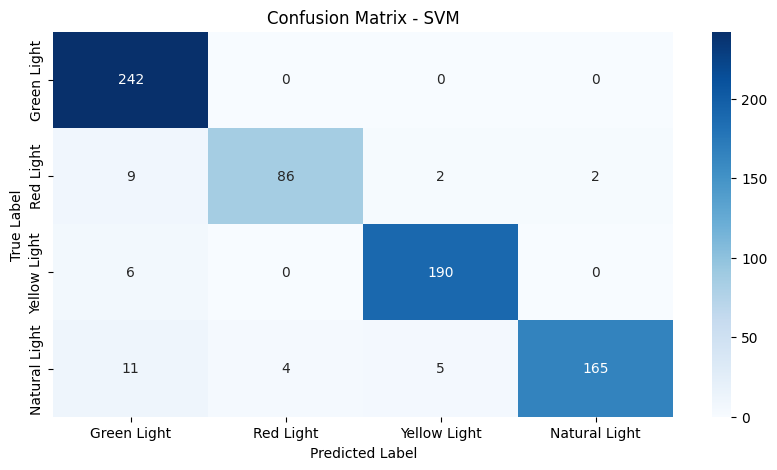

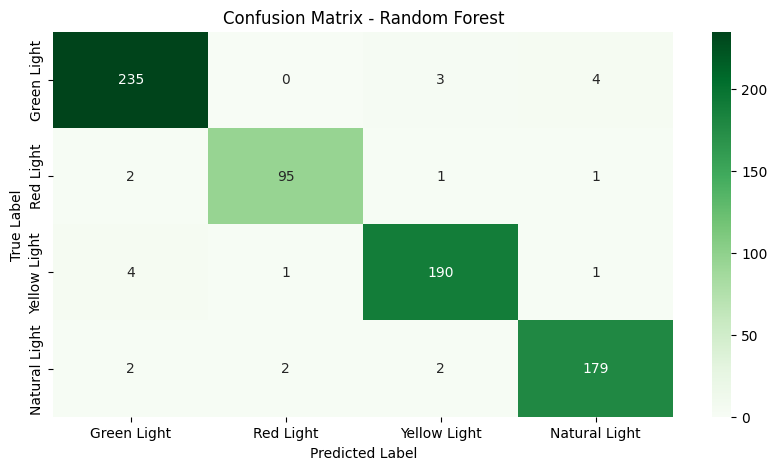

In [18]:
# Preparar los datos
cleaned_data = data.drop(columns=["Hr"], errors='ignore')  # Eliminar columna Hr si no tiene datos útiles

# Normalizar las columnas de luz
normalized_data = cleaned_data.copy()
for column in ['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']:
    normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / (normalized_data[column].max() - normalized_data[column].min())

# Recalcular las etiquetas basadas en las columnas normalizadas
normalized_data['Etiqueta'] = normalized_data[['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']].idxmax(axis=1)

# Dividir los datos en características (X) y etiquetas (y)
X_adjusted = normalized_data[['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']]
y_adjusted = normalized_data['Etiqueta']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adjusted, y_adjusted, test_size=0.2, random_state=42)

# Entrenar el modelo SVM ajustado
svm_model_adj = SVC(kernel='linear', random_state=42)
svm_model_adj.fit(X_train_adj, y_train_adj)
svm_pred_adj = svm_model_adj.predict(X_test_adj)

# Entrenar el modelo Random Forest ajustado
rf_model_adj = RandomForestClassifier(random_state=42)
rf_model_adj.fit(X_train_adj, y_train_adj)
rf_pred_adj = rf_model_adj.predict(X_test_adj)

# Evaluar los modelos ajustados
svm_report_adj = classification_report(y_test_adj, svm_pred_adj, target_names=y_adjusted.unique())
rf_report_adj = classification_report(y_test_adj, rf_pred_adj, target_names=y_adjusted.unique())

# Matrices de confusión
svm_conf_matrix_adj = confusion_matrix(y_test_adj, svm_pred_adj)
rf_conf_matrix_adj = confusion_matrix(y_test_adj, rf_pred_adj)

# Mostrar resultados
print("Classification Report - SVM")
print(svm_report_adj)
print("\nClassification Report - Random Forest")
print(rf_report_adj)

# Graficar la matriz de confusión para SVM
plt.figure(figsize=(10, 5))
sns.heatmap(svm_conf_matrix_adj, annot=True, fmt='d', cmap='Blues', xticklabels=['Green Light', 'Red Light', 'Yellow Light', 'Natural Light'], yticklabels=['Green Light', 'Red Light', 'Yellow Light', 'Natural Light'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Graficar la matriz de confusión para Random Forest
plt.figure(figsize=(10, 5))
sns.heatmap(rf_conf_matrix_adj, annot=True, fmt='d', cmap='Greens', xticklabels=['Green Light', 'Red Light', 'Yellow Light', 'Natural Light'], yticklabels=['Green Light', 'Red Light', 'Yellow Light', 'Natural Light'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.show()


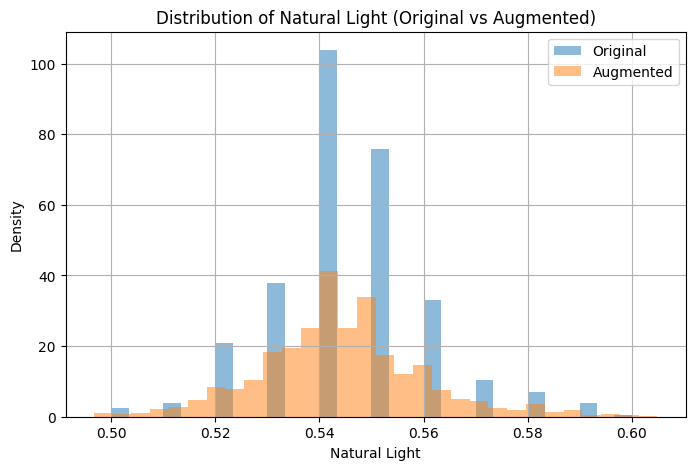

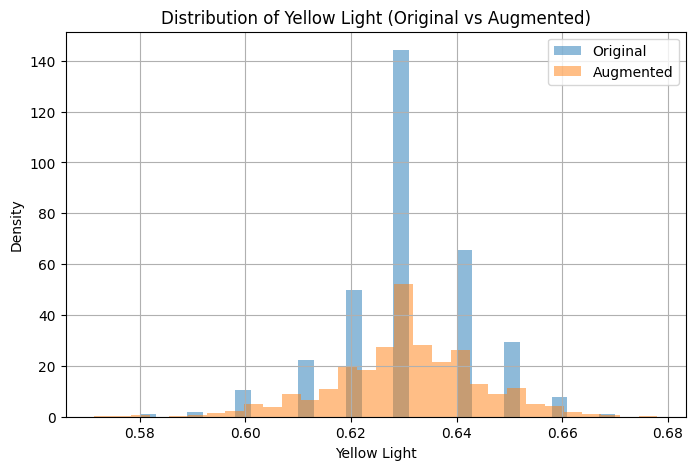

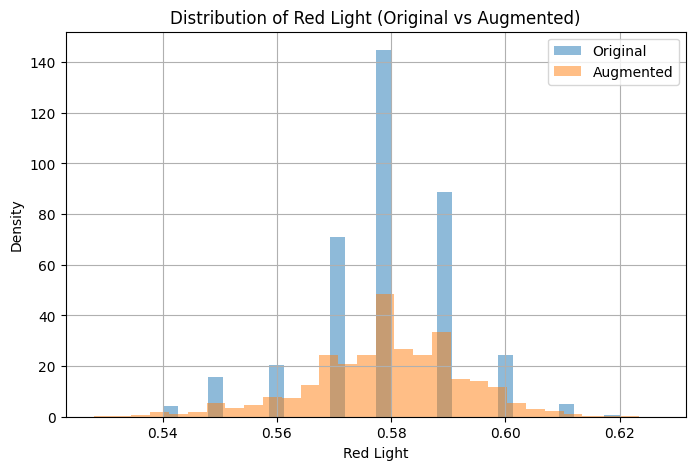

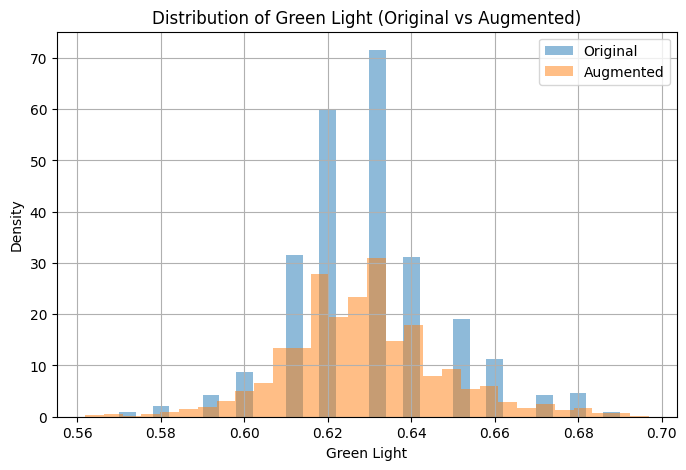

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_file.csv' with your file name)
data = pd.read_csv('/content/drive/MyDrive/MCPI/Articulo/Comparacion.csv')

# Rename columns for English representation
columns_to_plot_english = {
    'Luz Natural': 'Natural Light',
    'Luz Amarilla': 'Yellow Light',
    'Luz Roja': 'Red Light',
    'Luz Verde': 'Green Light'
}
data_english = data.rename(columns=columns_to_plot_english)

# Create augmented data (example augmentation)
augmented_data = data.copy()
for i in range(5):
    noisy_data = data.copy()
    for col in data.columns[1:]:
        noise = np.random.normal(0, 0.005, len(data[col]))
        noisy_data[col] += noise
    augmented_data = pd.concat([augmented_data, noisy_data], ignore_index=True)
augmented_data_english = augmented_data.rename(columns=columns_to_plot_english)

# Visualize distributions in English
for col in columns_to_plot_english.values():
    plt.figure(figsize=(8, 5))
    plt.hist(data_english[col], bins=30, alpha=0.5, label='Original', density=True)
    plt.hist(augmented_data_english[col], bins=30, alpha=0.5, label='Augmented', density=True)
    plt.title(f'Distribution of {col} (Original vs Augmented)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()


Classification Report - SVM
               precision    recall  f1-score   support

  Green Light       0.95      0.91      0.93       109
Natural Light       0.97      0.96      0.96       302
    Red Light       0.89      0.96      0.92       190
 Yellow Light       0.95      0.91      0.93       121

     accuracy                           0.94       722
    macro avg       0.94      0.93      0.94       722
 weighted avg       0.94      0.94      0.94       722


Classification Report - Random Forest
               precision    recall  f1-score   support

  Green Light       1.00      1.00      1.00       109
Natural Light       1.00      1.00      1.00       302
    Red Light       1.00      1.00      1.00       190
 Yellow Light       1.00      1.00      1.00       121

     accuracy                           1.00       722
    macro avg       1.00      1.00      1.00       722
 weighted avg       1.00      1.00      1.00       722

Cross-Validation Accuracy: 0.9997226074895977


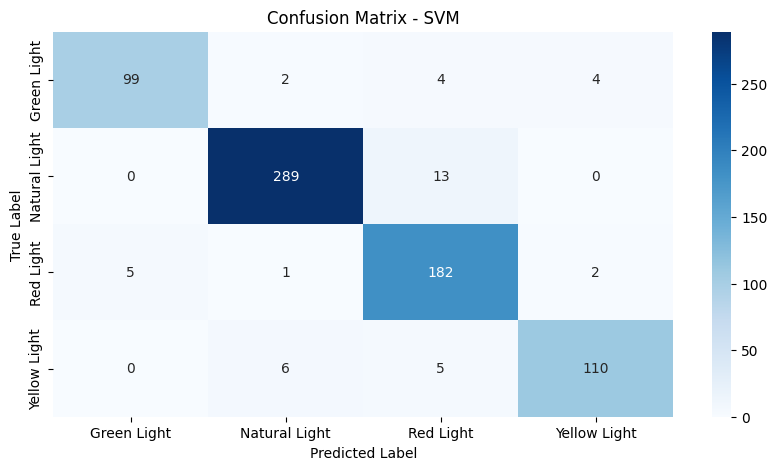

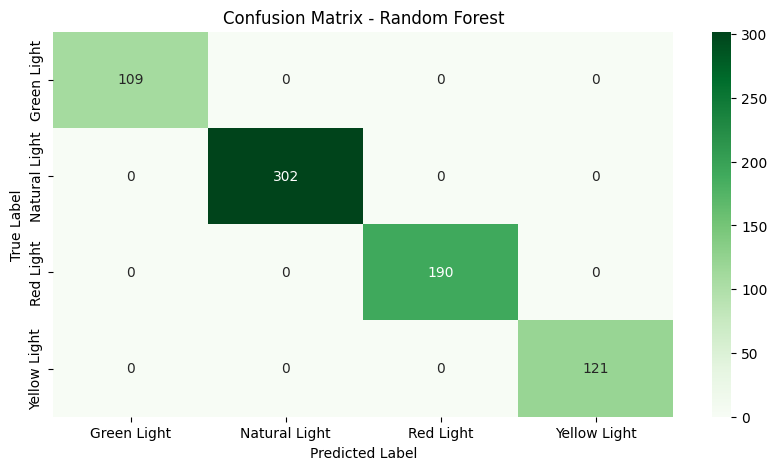

In [20]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
file_path = "/content/drive/MyDrive/MCPI/Articulo/Caracteristicas_Aumentadas.csv"  # Ajusta esto si es necesario
data = pd.read_csv(file_path)

# Preparar los datos
cleaned_data = data.drop(columns=["Hr"], errors='ignore')  # Eliminar columna Hr si no tiene datos útiles

# Normalizar las columnas de luz
normalized_data = cleaned_data.copy()
for column in ['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']:
    normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / (normalized_data[column].max() - normalized_data[column].min())

# Recalcular las etiquetas basadas en las columnas normalizadas
def assign_label(row):
    if row['Luz Roja'] >= 0.6:  # Luz Roja dominante
        return 'Red Light'
    elif row['Luz Verde'] >= 0.6:  # Luz Verde dominante
        return 'Green Light'
    elif row['Luz Amarilla'] >= 0.6:  # Luz Amarilla dominante
        return 'Yellow Light'
    else:  # Luz Natural como fallback
        return 'Natural Light'

normalized_data['Etiqueta'] = normalized_data.apply(assign_label, axis=1)

# Dividir los datos en características (X) y etiquetas (y)
X_adjusted = normalized_data[['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']]
y_adjusted = normalized_data['Etiqueta']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(
    X_adjusted, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted
)

# Modelo SVM ajustado
svm_model_adj = SVC(kernel='linear', random_state=42)
svm_model_adj.fit(X_train_adj, y_train_adj)
svm_pred_adj = svm_model_adj.predict(X_test_adj)

# Modelo Random Forest ajustado
rf_model_adj = RandomForestClassifier(random_state=42,max_depth=10,min_samples_leaf=5,n_estimators=100)
rf_model_adj.fit(X_train_adj, y_train_adj)
rf_pred_adj = rf_model_adj.predict(X_test_adj)

# Evaluar los modelos ajustados
unique_labels = sorted(list(set(y_train_adj.unique()).union(set(y_test_adj.unique()))))
svm_report_adj = classification_report(y_test_adj, svm_pred_adj, labels=unique_labels, target_names=unique_labels)
rf_report_adj = classification_report(y_test_adj, rf_pred_adj, labels=unique_labels, target_names=unique_labels)

# Matrices de confusión
svm_conf_matrix_adj = confusion_matrix(y_test_adj, svm_pred_adj, labels=unique_labels)
rf_conf_matrix_adj = confusion_matrix(y_test_adj, rf_pred_adj, labels=unique_labels)

# Mostrar reportes
print("Classification Report - SVM")
print(svm_report_adj)
print("\nClassification Report - Random Forest")
print(rf_report_adj)

from sklearn.model_selection import cross_val_score
rf_model_cv = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_model_cv, X_adjusted, y_adjusted, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


# Graficar la matriz de confusión para SVM
plt.figure(figsize=(10, 5))
sns.heatmap(svm_conf_matrix_adj, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Graficar la matriz de confusión para Random Forest
plt.figure(figsize=(10, 5))
sns.heatmap(rf_conf_matrix_adj, annot=True, fmt='d', cmap='Greens', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Cross-Validation Accuracy Scores: [0.87396122 0.88488211 0.84882108 0.85852982 0.86130374]
Mean Cross-Validation Accuracy: 0.8654995946688386
Classification Report - Random Forest
               precision    recall  f1-score   support

  Green Light       0.91      0.89      0.90       109
Natural Light       0.87      0.90      0.89       302
    Red Light       0.88      0.86      0.87       190
 Yellow Light       0.84      0.82      0.83       121

     accuracy                           0.87       722
    macro avg       0.87      0.87      0.87       722
 weighted avg       0.87      0.87      0.87       722



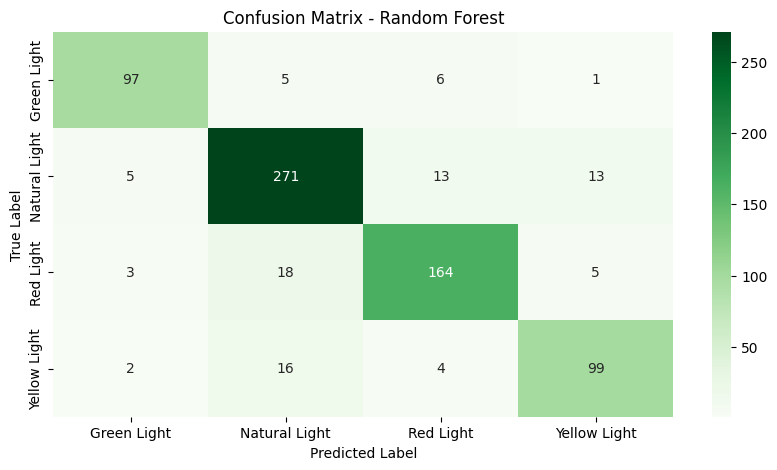

In [22]:
###CON RUIDO

import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
file_path = "/content/drive/MyDrive/MCPI/Articulo/Caracteristicas_Aumentadas.csv"  # Ajusta esto si es necesario
data = pd.read_csv(file_path)

# Preparar los datos
cleaned_data = data.drop(columns=["Hr"], errors='ignore')  # Eliminar columna Hr si no tiene datos útiles

# Normalizar las columnas de luz
normalized_data = cleaned_data.copy()
for column in ['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']:
    normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / (normalized_data[column].max() - normalized_data[column].min())

# Recalcular las etiquetas basadas en las columnas normalizadas
def assign_label(row):
    if row['Luz Roja'] >= 0.6:  # Luz Roja dominante
        return 'Red Light'
    elif row['Luz Verde'] >= 0.6:  # Luz Verde dominante
        return 'Green Light'
    elif row['Luz Amarilla'] >= 0.6:  # Luz Amarilla dominante
        return 'Yellow Light'
    else:  # Luz Natural como fallback
        return 'Natural Light'

normalized_data['Etiqueta'] = normalized_data.apply(assign_label, axis=1)

# Introducir ruido en las características
noisy_data = normalized_data.copy()
noise_factor = 0.03
for column in ['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']:
    noisy_data[column] += np.random.normal(0, noise_factor, noisy_data[column].shape)

# Dividir los datos en características (X) y etiquetas (y)
X_adjusted = noisy_data[['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']]
y_adjusted = noisy_data['Etiqueta']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(
    X_adjusted, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted
)

# Modelo Random Forest ajustado con validación cruzada
rf_model_adj = RandomForestClassifier(random_state=42)
cross_val_scores = cross_val_score(rf_model_adj, X_adjusted, y_adjusted, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())

# Entrenar el modelo con el conjunto de entrenamiento
rf_model_adj.fit(X_train_adj, y_train_adj)
rf_pred_adj = rf_model_adj.predict(X_test_adj)

# Evaluar el modelo
unique_labels = sorted(list(set(y_train_adj.unique()).union(set(y_test_adj.unique()))))
rf_report_adj = classification_report(y_test_adj, rf_pred_adj, labels=unique_labels, target_names=unique_labels)

# Matriz de confusión
rf_conf_matrix_adj = confusion_matrix(y_test_adj, rf_pred_adj, labels=unique_labels)

# Mostrar reporte
print("Classification Report - Random Forest")
print(rf_report_adj)

# Graficar la matriz de confusión para Random Forest
plt.figure(figsize=(10, 5))
sns.heatmap(rf_conf_matrix_adj, annot=True, fmt='d', cmap='Greens', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Cross-Validation Accuracy Scores (SVM): [0.82271468 0.83379501 0.8365651  0.82825485 0.8199446  0.80886427
 0.83055556 0.83611111 0.82222222 0.85555556]
Mean Cross-Validation Accuracy (SVM): 0.8294582948599569
Classification Report - SVM
               precision    recall  f1-score   support

  Green Light       0.87      0.73      0.80       109
Natural Light       0.82      0.88      0.85       302
    Red Light       0.81      0.85      0.83       190
 Yellow Light       0.80      0.71      0.75       121

     accuracy                           0.82       722
    macro avg       0.83      0.79      0.81       722
 weighted avg       0.82      0.82      0.82       722



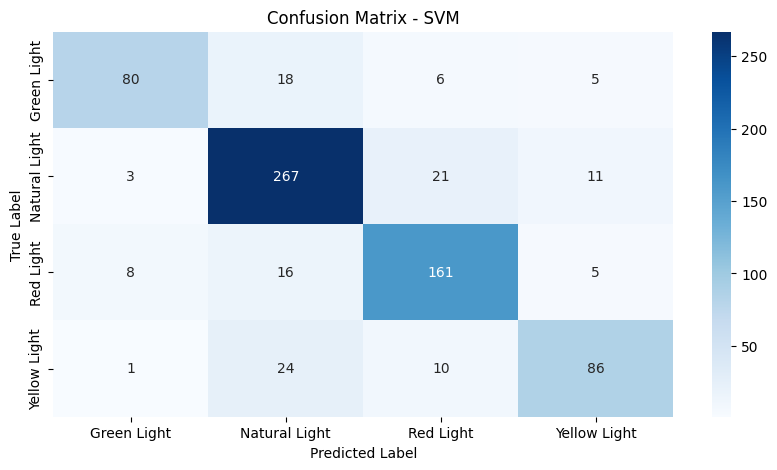

Cross-Validation Accuracy Scores (RF): [0.89196676 0.86980609 0.87257618 0.89750693 0.85595568 0.85872576
 0.86944444 0.87222222 0.88055556 0.85      ]
Mean Cross-Validation Accuracy (RF): 0.8718759618344107
Classification Report - Random Forest
               precision    recall  f1-score   support

  Green Light       0.93      0.85      0.89       109
Natural Light       0.88      0.91      0.90       302
    Red Light       0.90      0.93      0.91       190
 Yellow Light       0.88      0.83      0.85       121

     accuracy                           0.89       722
    macro avg       0.90      0.88      0.89       722
 weighted avg       0.90      0.89      0.89       722



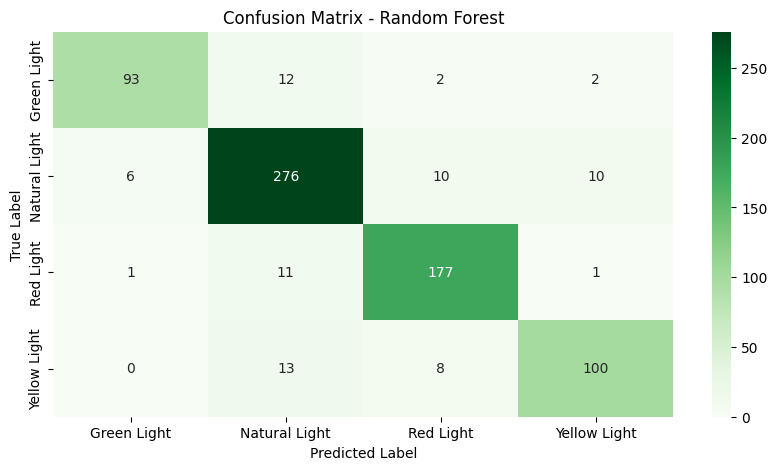

In [23]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
file_path = "/content/drive/MyDrive/MCPI/Articulo/Caracteristicas_Aumentadas.csv"  # Ajusta esto si es necesario
data = pd.read_csv(file_path)

# Preparar los datos
cleaned_data = data.drop(columns=["Hr"], errors='ignore')  # Eliminar columna Hr si no tiene datos útiles

# Normalizar las columnas de luz
normalized_data = cleaned_data.copy()
for column in ['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']:
    normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / (normalized_data[column].max() - normalized_data[column].min())

# Recalcular las etiquetas basadas en las columnas normalizadas
def assign_label(row):
    if row['Luz Roja'] >= 0.6:  # Luz Roja dominante
        return 'Red Light'
    elif row['Luz Verde'] >= 0.6:  # Luz Verde dominante
        return 'Green Light'
    elif row['Luz Amarilla'] >= 0.6:  # Luz Amarilla dominante
        return 'Yellow Light'
    else:  # Luz Natural como fallback
        return 'Natural Light'

normalized_data['Etiqueta'] = normalized_data.apply(assign_label, axis=1)

# Introducir ruido para SVM
noisy_data_svm = normalized_data.copy()
noise_factor_svm = 0.04  # Nivel de ruido para SVM
for column in ['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']:
    noisy_data_svm[column] += np.random.normal(0, noise_factor_svm, noisy_data_svm[column].shape)

# Introducir ruido para Random Forest
noisy_data_rf = normalized_data.copy()
noise_factor_rf = 0.03  # Nivel de ruido para RF
for column in ['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']:
    noisy_data_rf[column] += np.random.normal(0, noise_factor_rf, noisy_data_rf[column].shape)

# Dividir los datos en características (X) y etiquetas (y) para SVM
X_adjusted_svm = noisy_data_svm[['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']]
y_adjusted_svm = noisy_data_svm['Etiqueta']

# Dividir los datos en características (X) y etiquetas (y) para RF
X_adjusted_rf = noisy_data_rf[['Luz Natural', 'Luz Amarilla', 'Luz Roja', 'Luz Verde']]
y_adjusted_rf = noisy_data_rf['Etiqueta']

# Dividir los datos en conjuntos de entrenamiento y prueba para SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_adjusted_svm, y_adjusted_svm, test_size=0.2, random_state=42, stratify=y_adjusted_svm
)

# Dividir los datos en conjuntos de entrenamiento y prueba para RF
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_adjusted_rf, y_adjusted_rf, test_size=0.2, random_state=42, stratify=y_adjusted_rf
)

# Modelo SVM ajustado
svm_model_adj = SVC(kernel='linear', random_state=42)

# Validación cruzada para SVM
cross_val_scores_svm = cross_val_score(svm_model_adj, X_adjusted_svm, y_adjusted_svm, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy Scores (SVM):", cross_val_scores_svm)
print("Mean Cross-Validation Accuracy (SVM):", cross_val_scores_svm.mean())

# Entrenar el modelo SVM con el conjunto de entrenamiento
svm_model_adj.fit(X_train_svm, y_train_svm)
svm_pred_adj = svm_model_adj.predict(X_test_svm)

# Evaluar el modelo SVM
svm_report_adj = classification_report(y_test_svm, svm_pred_adj, target_names=sorted(y_adjusted_svm.unique()))

# Matriz de confusión para SVM
svm_conf_matrix_adj = confusion_matrix(y_test_svm, svm_pred_adj, labels=sorted(y_adjusted_svm.unique()))

# Mostrar reporte SVM
print("Classification Report - SVM")
print(svm_report_adj)

# Graficar la matriz de confusión para SVM
plt.figure(figsize=(10, 5))
sns.heatmap(svm_conf_matrix_adj, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_adjusted_svm.unique()), yticklabels=sorted(y_adjusted_svm.unique()))
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Modelo Random Forest ajustado con hiperparámetros menos complejos
rf_model_adj = RandomForestClassifier(
    random_state=42,
    max_depth=10,  # Limitar la profundidad del árbol
    min_samples_split=10,  # Número mínimo de muestras para dividir un nodo
    min_samples_leaf=5  # Número mínimo de muestras en una hoja
)

# Validación cruzada para Random Forest
cross_val_scores_rf = cross_val_score(rf_model_adj, X_adjusted_rf, y_adjusted_rf, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy Scores (RF):", cross_val_scores_rf)
print("Mean Cross-Validation Accuracy (RF):", cross_val_scores_rf.mean())

# Entrenar el modelo Random Forest con el conjunto de entrenamiento
rf_model_adj.fit(X_train_rf, y_train_rf)
rf_pred_adj = rf_model_adj.predict(X_test_rf)

# Evaluar el modelo Random Forest
rf_report_adj = classification_report(y_test_rf, rf_pred_adj, target_names=sorted(y_adjusted_rf.unique()))

# Matriz de confusión para Random Forest
rf_conf_matrix_adj = confusion_matrix(y_test_rf, rf_pred_adj, labels=sorted(y_adjusted_rf.unique()))

# Mostrar reporte Random Forest
print("Classification Report - Random Forest")
print(rf_report_adj)

# Graficar la matriz de confusión para Random Forest
plt.figure(figsize=(10, 5))
sns.heatmap(rf_conf_matrix_adj, annot=True, fmt='d', cmap='Greens', xticklabels=sorted(y_adjusted_rf.unique()), yticklabels=sorted(y_adjusted_rf.unique()))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
